# Question1 code

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,matthews_corrcoef,recall_score
from sklearn import metrics, svm,tree
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,GridSearchCV

In [3]:
data = pd.read_csv('C:\\Users\\centrtal2021\\Downloads\\Breast_cancer_data.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
sick=data[data.diagnosis==1]

In [6]:
well=data[data.diagnosis==0]

In [7]:
sick


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
19,13.540,14.36,87.46,566.3,0.09779,1
20,13.080,15.71,85.63,520.0,0.10750,1
21,9.504,12.44,60.34,273.9,0.10240,1
37,13.030,18.42,82.61,523.8,0.08983,1
46,8.196,16.84,51.71,201.9,0.08600,1
...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,1
559,11.510,23.93,74.52,403.5,0.09261,1
560,14.050,27.15,91.38,600.4,0.09929,1
561,11.200,29.37,70.67,386.0,0.07449,1


<function matplotlib.pyplot.show(close=None, block=None)>

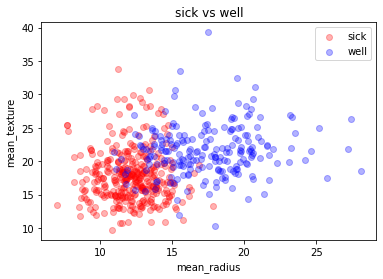

In [8]:
plt.title('sick vs well')
plt.xlabel('mean_radius')
plt.ylabel('mean_texture')
plt.scatter(sick.mean_radius,sick.mean_texture,color='red',label='sick',alpha=0.3)
plt.scatter(well.mean_radius,well.mean_texture,color='blue',label='well',alpha=0.3)
plt.legend()
plt.show

In [26]:
x1=data['mean_radius']
x2=data['mean_texture']
x3=data['mean_perimeter']
x4=data['mean_smoothness']
x5=data['mean_smoothness']

In [ ]:
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

mean and standard deviation: 14.127291739894563 3.5209507607110626


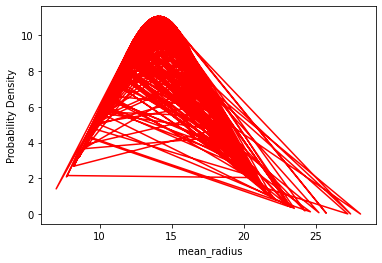

In [33]:
#Calculate mean and Standard deviation.
mean = np.mean(x1)
sd = np.std(x1)
 
#Apply function to the data.
pdf = normal_dist(x1,mean,sd)
 
#Plotting the Results
plt.plot(x1,pdf , color = 'red')
plt.xlabel(' mean_radius')
plt.ylabel('Probability Density')
print('mean and standard deviation:',mean,sd)

mean and standard deviation: 19.28964850615117 4.297254637090421


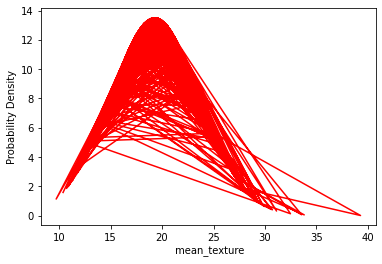

In [34]:
#Calculate mean and Standard deviation.
mean = np.mean(x2)
sd = np.std(x2)
 
#Apply function to the data.
pdf = normal_dist(x2,mean,sd)
 
#Plotting the Results
plt.plot(x2,pdf , color = 'red')
plt.xlabel(' mean_texture')
plt.ylabel('Probability Density')
print('mean and standard deviation:',mean,sd)

mean and standard deviation: 91.96903339191566 24.277619293053174


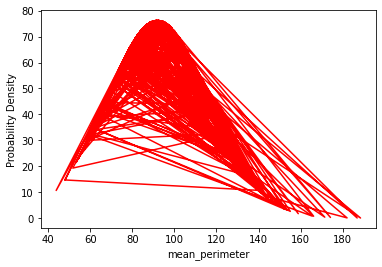

In [35]:
#Calculate mean and Standard deviation.
mean = np.mean(x3)
sd = np.std(x3)
 
#Apply function to the data.
pdf = normal_dist(x3,mean,sd)
 
#Plotting the Results
plt.plot(x3,pdf , color = 'red')
plt.xlabel('mean_perimeter')
plt.ylabel('Probability Density')
print('mean and standard deviation:',mean,sd)

mean and standard deviation: 0.096360281195079 0.014051764066591201


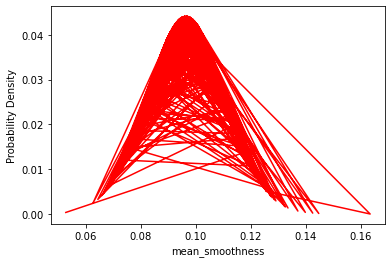

In [36]:
#Calculate mean and Standard deviation.
mean = np.mean(x4)
sd = np.std(x4)
 
#Apply function to the data.
pdf = normal_dist(x4,mean,sd)
 
#Plotting the Results
plt.plot(x4,pdf , color = 'red')
plt.xlabel('mean_smoothness')
plt.ylabel('Probability Density')
print('mean and standard deviation:',mean,sd)

mean and standard deviation: 0.096360281195079 0.014051764066591201


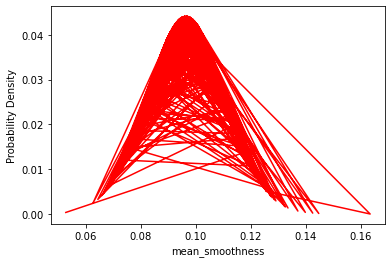

In [38]:
#Calculate mean and Standard deviation.
mean = np.mean(x5)
sd = np.std(x5)
 
#Apply function to the data.
pdf = normal_dist(x5,mean,sd)
 
#Plotting the Results
plt.plot(x5,pdf , color = 'red')
plt.xlabel('mean_smoothness')
plt.ylabel('Probability Density')
print('mean and standard deviation:',mean,sd)

In [39]:
x=data.drop(['diagnosis'],axis=1)
y=data.diagnosis.values

In [40]:
x=(x-np.min(x))/(np.max(x)-np.min(x))

In [41]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [64]:
Xtrain=data.iloc[:, :-1]
Ytrain=data.iloc[:,-1]
Xtest=data.iloc[:, :-1]
Ytest=data.iloc[:,-1]

In [43]:
from sklearn.naive_bayes import GaussianNB
classifier1=GaussianNB()
classifier1.fit(Xtrain,Ytrain)
pred=classifier1.predict(Xtest)



In [44]:
(pred == Ytest).mean()
#accuracy

0.9033391915641477

In [45]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix

acc = accuracy_score(Ytest, pred)
#برای وقتی هست که داده ها متوازن باشن
rec = recall_score(Ytest, pred)

pre = precision_score(Ytest, pred)


fm = f1_score(Ytest, pred)


conf = confusion_matrix(Ytest, pred)

print(acc, rec, pre, fm)
print(conf)
print(classification_report(Ytest, pred))
# صد و هفتاد داده به درستی صفر تشخیص داده شده
#سی صد و چهل چهار داده به درستی یک تشخیص داده شده
# پنجاه پنج داده باقی مانده اشتباهات  هستند

0.9033391915641477 0.9635854341736695 0.8911917098445595 0.9259757738896366
[[170  42]
 [ 13 344]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       212
           1       0.89      0.96      0.93       357

    accuracy                           0.90       569
   macro avg       0.91      0.88      0.89       569
weighted avg       0.91      0.90      0.90       569



# Question2 code

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

In [48]:
df = pd.read_csv('C:\\Users\\centrtal2021\\Downloads\\Breast_cancer_data.csv')
print(df.head())
#print(df.keys())

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  


In [49]:

#df = df.astype({'0':'float'})
df_std = StandardScaler().fit_transform(df)
mean_vec = np.mean(df_std, axis = 0)
cov_mat = np.cov(df_std.T)
print(cov_mat)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print(eig_vals)
print(eig_vecs)

[[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151 -0.73131377]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969 -0.41591626]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309 -0.74394299]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005 -0.71023205]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056 -0.35919123]
 [-0.73131377 -0.41591626 -0.74394299 -0.71023205 -0.35919123  1.00176056]]
[3.83605507e+00 1.03578022e+00 8.30441853e-01 2.91095013e-01
 1.39212910e-03 1.57990892e-02]
[[-0.49492212 -0.06100523  0.23990282  0.15628968  0.70733665 -0.4111271 ]
 [-0.23293133 -0.47712714 -0.80420402  0.26697554  0.00629552 -0.00574548]
 [-0.49803542 -0.03130825  0.21411585  0.1620177  -0.70625281 -0.42437265]
 [-0.4911335  -0.05652924  0.24270798  0.21916641 -0.01119123  0.80531112]
 [-0.15022172  0.86522406 -0.36888285  0.30338288  0.02648406 -0.00190311]
 [ 0.434715   -0.1258555   0.23425459  0.85905342 -0.00394246 -0.04816356]]


In [50]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort()
eig_pairs.reverse()
print(eig_pairs)

[(3.8360550723962623, array([-0.49492212, -0.23293133, -0.49803542, -0.4911335 , -0.15022172,
        0.434715  ])), (1.035780224036483, array([-0.06100523, -0.47712714, -0.03130825, -0.05652924,  0.86522406,
       -0.1258555 ])), (0.8304418527005263, array([ 0.23990282, -0.80420402,  0.21411585,  0.24270798, -0.36888285,
        0.23425459])), (0.2910950128598334, array([0.15628968, 0.26697554, 0.1620177 , 0.21916641, 0.30338288,
       0.85905342])), (0.01579908919182589, array([-0.4111271 , -0.00574548, -0.42437265,  0.80531112, -0.00190311,
       -0.04816356])), (0.001392129096763669, array([ 0.70733665,  0.00629552, -0.70625281, -0.01119123,  0.02648406,
       -0.00394246]))]


In [51]:
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse = True)]
print(var_exp)

[63.821888726452116, 17.232664535814934, 13.81637294475391, 4.843057038792772, 0.2628553796413913, 0.023161374544867115]


In [52]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(6,1), 
                      eig_pairs[1][1].reshape(6,1),
                      eig_pairs[2][1].reshape(6,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.49492212 -0.06100523  0.23990282]
 [-0.23293133 -0.47712714 -0.80420402]
 [-0.49803542 -0.03130825  0.21411585]
 [-0.4911335  -0.05652924  0.24270798]
 [-0.15022172  0.86522406 -0.36888285]
 [ 0.434715   -0.1258555   0.23425459]]


In [53]:
Y = df_std.dot(matrix_w)
print(Y)

[[-1.97568481  2.34730684  1.55883485]
 [-3.04023374 -0.65577132  1.54868585]
 [-3.1396354   0.52733517  0.07436711]
 ...
 [-1.88078266 -1.63646057 -1.18622084]
 [-4.08698311  0.09635452 -1.45913976]
 [ 2.97849615 -3.12926935 -0.80350587]]


# Questian3 code

In [68]:
x=Y
y=data.diagnosis.values

In [69]:
x

array([[-1.97568481,  2.34730684,  1.55883485],
       [-3.04023374, -0.65577132,  1.54868585],
       [-3.1396354 ,  0.52733517,  0.07436711],
       ...,
       [-1.88078266, -1.63646057, -1.18622084],
       [-4.08698311,  0.09635452, -1.45913976],
       [ 2.97849615, -3.12926935, -0.80350587]])

In [70]:
x=(x-np.min(x))/(np.max(x)-np.min(x))

In [71]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [72]:
Xtrain=x
Ytrain=y
Xtest=x
Ytest=y

In [73]:
from sklearn.naive_bayes import GaussianNB
classifier1=GaussianNB()
classifier1.fit(Xtrain,Ytrain)
pred=classifier1.predict(Xtest)


In [74]:
(pred == Ytest).mean()
#accuracy

0.9824253075571178

In [75]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix

acc = accuracy_score(Ytest, pred)
#برای وقتی هست که داده ها متوازن باشن
rec = recall_score(Ytest, pred)

pre = precision_score(Ytest, pred)


fm = f1_score(Ytest, pred)


conf = confusion_matrix(Ytest, pred)

print(acc, rec, pre, fm)
print(conf)
print(classification_report(Ytest, pred))
#  دویست و  هفت داده به درستی صفر تشخیص داده شده
#سی صد و پنجاه دو داده به درستی یک تشخیص داده شده
# ده داده باقی مانده اشتباهات  هستند

0.9824253075571178 0.9859943977591037 0.9859943977591037 0.9859943977591037
[[207   5]
 [  5 352]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       212
           1       0.99      0.99      0.99       357

    accuracy                           0.98       569
   macro avg       0.98      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569

